In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
#importing datasets
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
transaction = pd.read_csv('QVI_transaction_data.csv')

In [3]:
#Examining transacton data
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17-10-2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14-05-2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20-05-2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17-08-2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18-08-2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [5]:
#Changing type of 'Date' column
transaction['DATE'] = pd.to_datetime(transaction['DATE'])
print(transaction['DATE'].astype)

<bound method NDFrame.astype of 0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]>


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6776\113350563.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transaction['DATE'] = pd.to_datetime(transaction['DATE'])


In [6]:
#Extracting product weight from product name
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.lower().str.replace(r'\s+', ' ', regex=True).str.strip()
def extract_weight(text):
    match = re.search(r'\d+\s*g', text)
    if match:
        return match.group(0).replace(' ', '')  # Remove any spaces in the weight
    return None

transaction['weight'] = transaction['PROD_NAME'].apply(extract_weight)
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace(r'\d+\s*g', '', regex=True).str.strip()

In [7]:
transaction['PROD_NAME'].unique()

array(['natural chip compny seasalt', 'ccs nacho cheese',
       'smiths crinkle cut chips chicken',
       'smiths chip thinly s/cream&onion',
       'kettle tortilla chpshny&jlpno chili',
       'old el paso salsa dip tomato mild',
       'smiths crinkle chips salt & vinegar', 'grain waves sweet chilli',
       'doritos corn chip mexican jalapeno',
       'grain waves sour cream&chives', 'kettle sensations siracha lime',
       'twisties cheese', 'ww crinkle cut chicken',
       'thins chips light& tangy', 'ccs original', 'burger rings',
       'ncc sour cream & garden chives',
       'doritos corn chip southern chicken', 'cheezels cheese box',
       'smiths crinkle original', 'infzns crn crnchers tangy gcamole',
       'kettle sea salt and vinegar', 'smiths chip thinly cut original',
       'kettle original', 'red rock deli thai chilli&lime',
       'pringles sthrn friedchicken', 'pringles sweet&spcy bbq',
       'red rock deli sr salsa & mzzrlla', 'thins chips originl saltd',
    

In [8]:
transaction['weight'].unique()

array(['175g', '170g', '150g', '300g', '330g', '210g', '270g', '220g',
       '125g', '110g', '134g', '380g', '180g', '165g', '135g', '250g',
       '200g', '160g', '190g', '90g', '70g'], dtype=object)

In [9]:
transaction['PROD_NAME'] = transaction['PROD_NAME'].astype("string")
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  string        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   weight          264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(1), string(1)
memory usage: 18.2+ MB


In [10]:
#Removing products that contain 'salsa' in name because we only want to focus on chips
filter = transaction['PROD_NAME'].str.contains('salsa')
transaction = transaction[~filter]
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  string        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
 8   weight          246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(1), string(1)
memory usage: 18.8+ MB


In [11]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


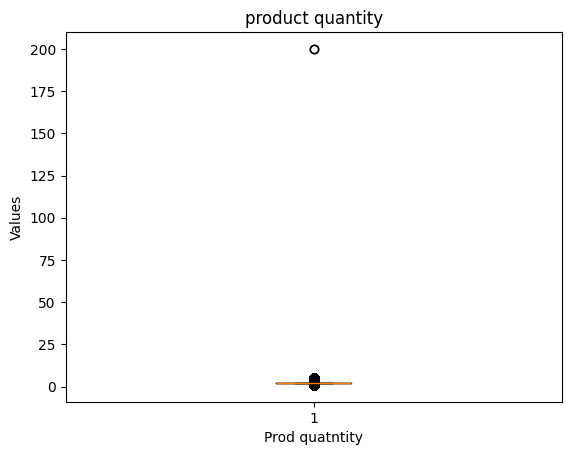

In [12]:
#Identifying outliers
plt.boxplot(transaction['PROD_QTY'])
plt.title('product quantity')
plt.xlabel('Prod quatntity')
plt.ylabel('Values')

plt.show()

In [13]:
#This customer only has two transactions over the year, which could maybe for resale purposes, so we can remove it
transaction[transaction['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight
69762,2018-08-19,226,226000,226201,4,dorito corn chp supreme,200,650.0,380g
69763,2019-05-20,226,226000,226210,4,dorito corn chp supreme,200,650.0,380g


In [14]:
#Removing outlier
transaction = transaction.drop(transaction[transaction['LYLTY_CARD_NBR'] == 226000].index)
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  string        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   weight          246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(1), string(1)
memory usage: 18.8+ MB


In [15]:
#Counting number of transactions by date
transaction['DATE'].value_counts()

DATE
2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: count, Length: 364, dtype: int64

In [16]:
#There's only 364 rows, indicating missing data. I created a column of dates that includes every day from 1 Jul 2018 to 30 Jun 2019, and join it onto the data to fill in the missing day.
all_date = pd.date_range(start ='2018-07-01', end ='2019-06-30', freq ='D')
all_date_df = pd.DataFrame({'DATE' : all_date})
transactions_by_day = pd.merge(all_date_df, transaction, on='DATE', how='left')

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


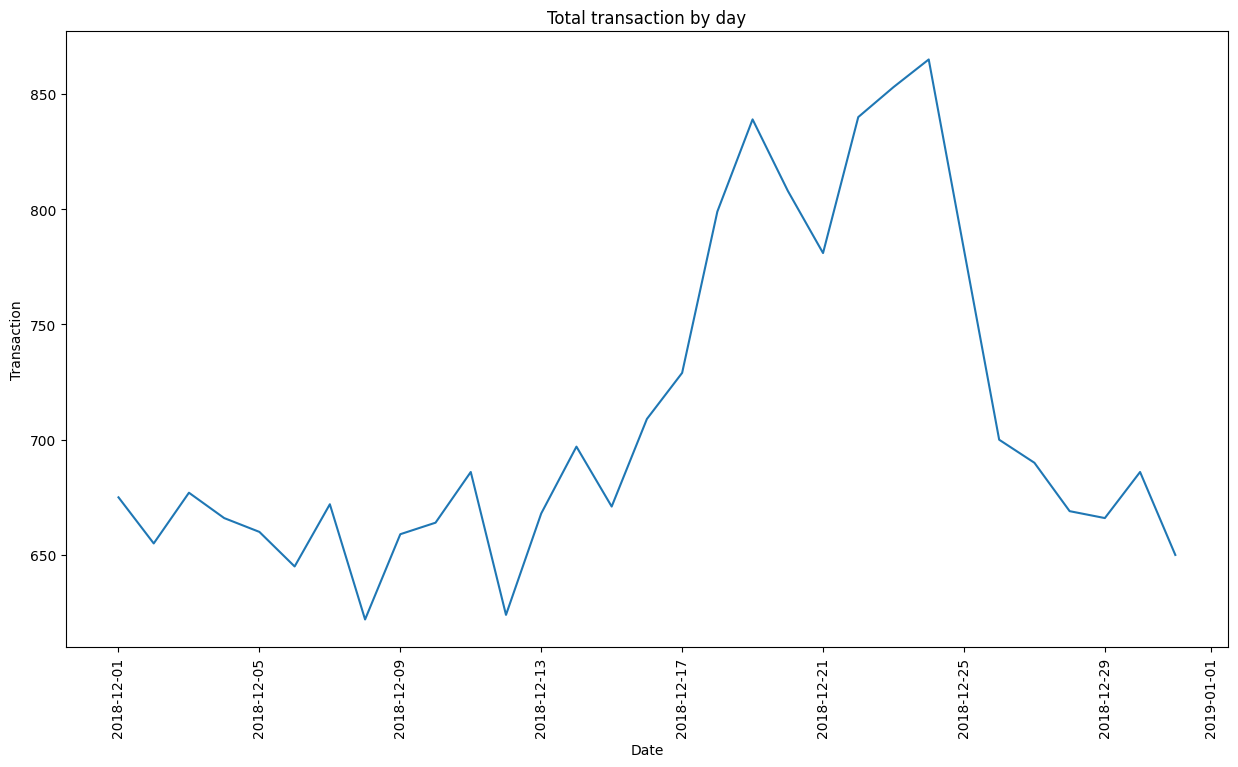

In [17]:
#Plotting transactions over time.
total_transaction = transaction.groupby('DATE').size().reset_index(name = 'N')
dec_data = total_transaction[total_transaction['DATE'].dt.month == 12]
plt.figure(figsize=(15,8))
sns.lineplot(x='DATE', y='N',data=dec_data)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Total transaction by day')
plt.xlabel('Date')
plt.ylabel('Transaction')
plt.xticks(rotation=90) 
plt.show()

In [18]:
#According to the plot, there is an increase in sale around Christmas before the sale starts to decline

In [19]:
#Finding out the maximum and minimum pack size
transaction['weight'] = transaction['weight'].str.replace('g', '')
transaction['weight'] = transaction['weight'].astype("int")

max_weight = transaction['weight'].max()
min_weight = transaction['weight'].min()

print(f"Maximum weight = {max_weight}\nMinimum weight = {min_weight}")

Maximum weight = 380
Minimum weight = 70


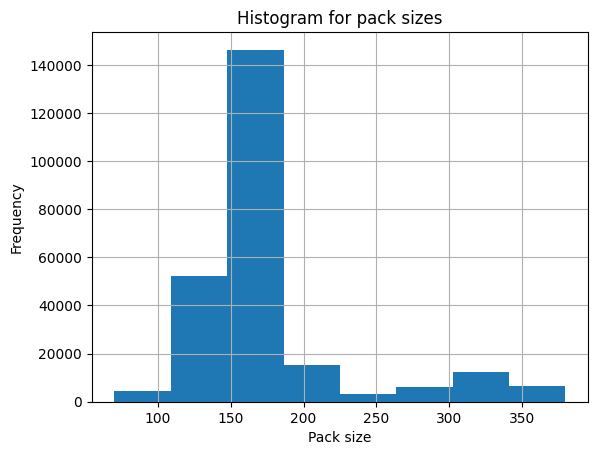

In [20]:
#Plotting pack sizes on a histogram
hist = transaction['weight'].hist(bins=8) 
plt.title('Histogram for pack sizes') 
plt.xlabel('Pack size') 
plt.ylabel('Frequency') 
plt.show()

In [21]:
#Finding out unique brands by extrating it from the product name
transaction['brand'] = transaction['PROD_NAME'].str.split(' ').str[0]
transaction['brand'].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'grain', 'doritos',
       'twisties', 'ww', 'thins', 'burger', 'ncc', 'cheezels', 'infzns',
       'red', 'pringles', 'dorito', 'infuzions', 'smith', 'grnwves',
       'tyrrells', 'cobs', 'french', 'rrd', 'tostitos', 'cheetos',
       'woolworths', 'snbts', 'sunbites'], dtype=object)

In [22]:
#Cleaning and combining similar brand names
transaction['brand'] = transaction['brand'].replace({'red' : 'rrd' , 'dorito' : 'doritos', 'smith' : 'smiths', 'snbts' : 'sunbites',
                                                     'infzns' : 'infuzions', 'ww' : 'woolworths', 'ncc' : 'natural', 'grain' : 'grnwves'})
transaction['brand'].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'grnwves', 'doritos',
       'twisties', 'woolworths', 'thins', 'burger', 'cheezels',
       'infuzions', 'rrd', 'pringles', 'tyrrells', 'cobs', 'french',
       'tostitos', 'cheetos', 'sunbites'], dtype=object)

In [23]:
#Examining customer data
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [24]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [25]:
#Merging the two datasets
merged_data = transaction.merge(purchase, on='LYLTY_CARD_NBR', how='left')

In [26]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  string        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   weight            246740 non-null  int32         
 9   brand             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(3), string(1)
memory usage: 21.6+ MB


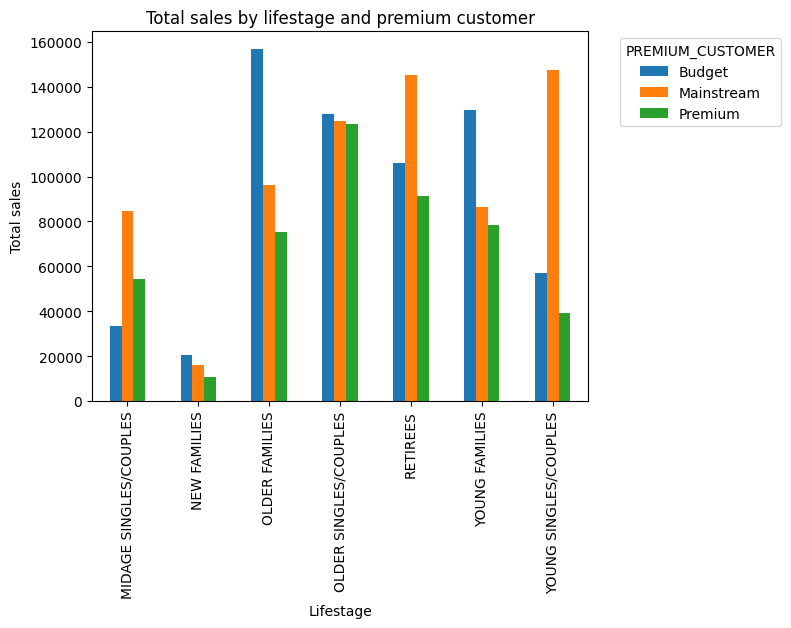

In [27]:
#Finding out total sales by lifestage and premium customer
total_sales = pd.pivot_table(data=merged_data, index=['LIFESTAGE'], columns=['PREMIUM_CUSTOMER'], values='TOT_SALES', aggfunc = 'sum')
ax = total_sales.plot(kind = 'bar' , stacked = False, title = 'Total sales by lifestage and premium customer')
ax.set(xlabel='Lifestage', ylabel='Total sales')
ax.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1.05, 1), loc='upper left') 

In [28]:
#Budget older families and mainstream young singles/ couples are contributing the most to sales

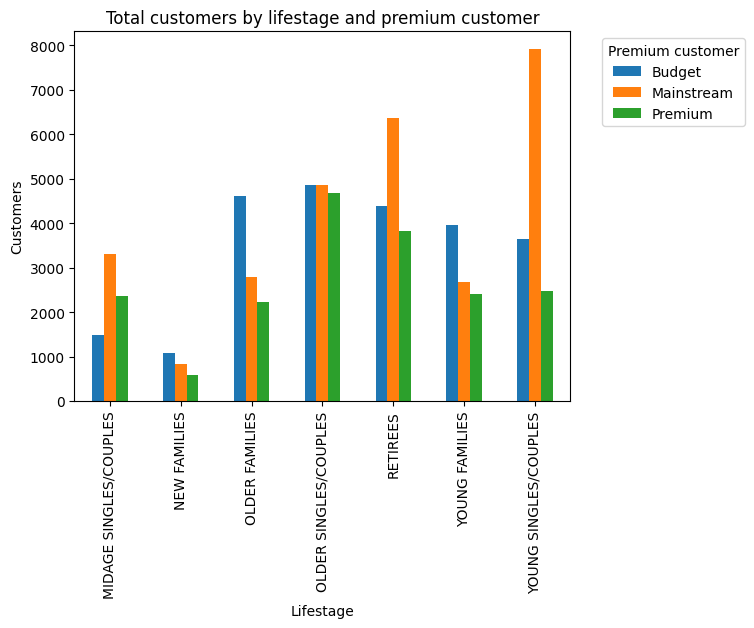

In [29]:
#Finding out total number of customers by lifestage and premium customer
total_customers = pd.pivot_table(data=merged_data, index=['LIFESTAGE'], columns=['PREMIUM_CUSTOMER'],  values= 'LYLTY_CARD_NBR', aggfunc = 'nunique')
ax = total_customers.plot(kind = 'bar' , stacked = False, title = 'Total customers by lifestage and premium customer')
ax.set(xlabel='Lifestage', ylabel='Customers')
ax.legend(title='Premium customer', bbox_to_anchor=(1.05, 1), loc='upper left') 

In [30]:
#Mainstream young singles/couples have the most number of customers which is why they contribute towards a higher sales value. Wherease, for budget older families, the number of customers are low. So their contribution towards high sales could be due to purchasing more units of chips.

In [31]:
#Taking further look into avergae chips purchased per customer by lifestage and premium customer
avg_units = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(total_prod_qty=('PROD_QTY', 'sum'),
                                                                       unique_customers=('LYLTY_CARD_NBR', 'nunique')).reset_index()
avg_units['avg_units_per_customer'] = avg_units['total_prod_qty'] / avg_units['unique_customers']

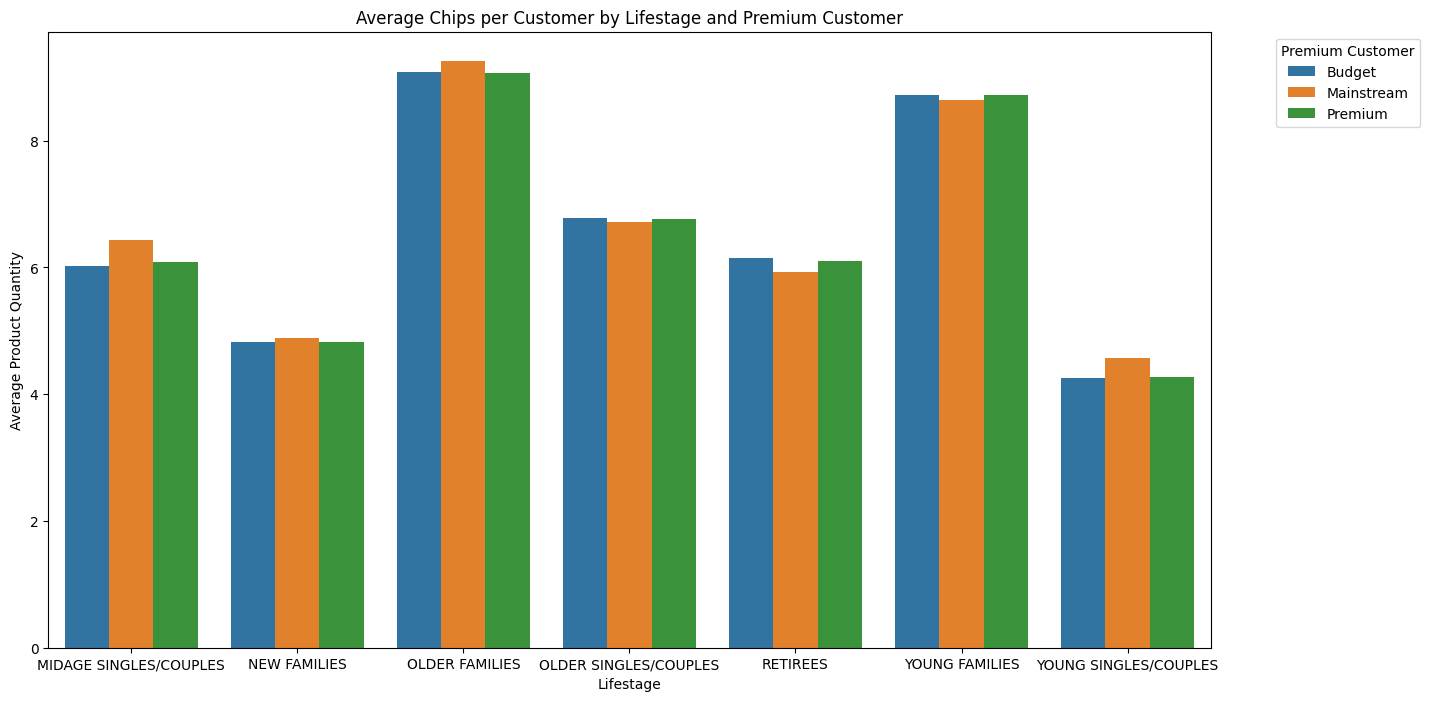

In [32]:
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_units, x='LIFESTAGE', y='avg_units_per_customer', hue='PREMIUM_CUSTOMER')
plt.title('Average Chips per Customer by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Average Product Quantity')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [46]:
#Older families and young families in general purchase more chips.

In [34]:
#Finding out average price spent per customer by lifestage and premium customer as this could also drive total sales.
avg_price = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(total_sales=('TOT_SALES', 'sum'),
                                                                       total_prod_qty=('PROD_QTY', 'sum')).reset_index()
avg_price['avg_price_per_customer'] = avg_price['total_sales'] / avg_price['total_prod_qty']

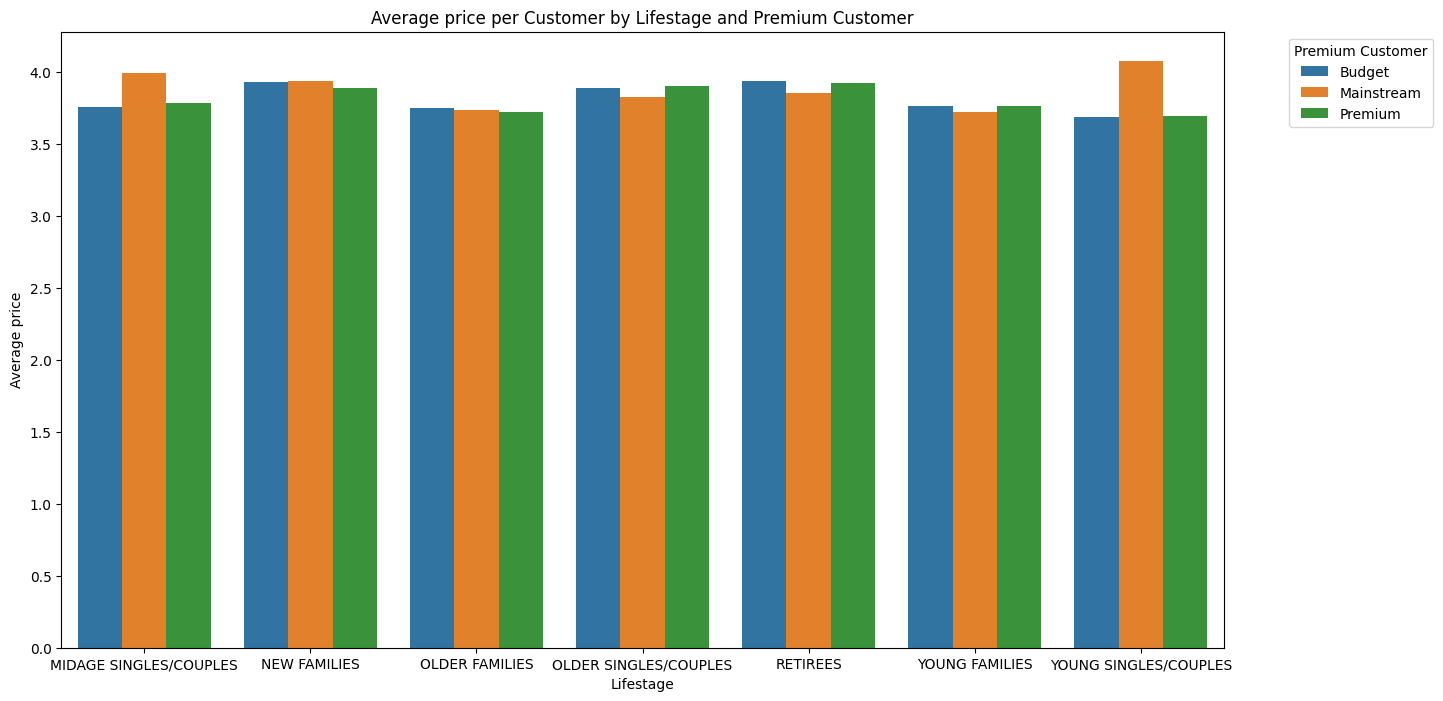

In [35]:
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_price, x='LIFESTAGE', y='avg_price_per_customer', hue='PREMIUM_CUSTOMER')
plt.title('Average price per Customer by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Average price')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [36]:
#Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts.

In [ ]:
Two datastes are used in this project :

Transaction datatset - a year worth's of transaction data of chips
Purchase dataset - customer dataset for a region.
I start with the transction data, cleaning and examining the data, checking for any missing and null value or any incorrect formats and outliers. After cleaning the data, i move on to find out the different brands and pack sizes that are being offered. I try to use a line chart to explore the sales performance in the last year, which shows that most sales happened around christmas.

I then move on to examine the purchase datset, and merge it with the transaction dataset by using the loyalty card number which was unique to each customer.

To find out what affects total sales, i first had a look at which customer segment contibutes the most towards sales. According to the analysis, budget older families and mainstream young singles/ couples are contributing the most to sales. Total sales could be affected by number of customers, so i took a look at number of customrs by customers segment. The analysis showed that mainstream young singles/couples have the most number of customers which is why they contribute towards a higher sales value. Wherease, for budget older families, the number of customers are low.

Since number of customers is not a prime reason for high sales for budget older families, I investigate the avergae chips purchased per customer as it could also drive total sales. The bar chart showed that older families across all customer segments do indeed purchase higher number of avergae chips. The same goes for young families.

Lastly, I take a look at avergae price spent per customer by different customer segemnts, which showed that mainstream midage and young singles and couples are paying more per packet of chips compared to their budget and premium counterparts.